In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
print np.__version__

1.12.1


In [17]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X.shape

(150L, 2L)

In [18]:
X[:5]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.3, random_state=819)
print X_train.shape
print X_test.shape

(105L, 2L)
(45L, 2L)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train )
print sc.get_params()
print sc.mean_
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

{'copy': True, 'with_mean': True, 'with_std': True}
[ 3.79142857  1.20761905]


In [21]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=819)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print 'Wrong Sample num: %d' %((y_test!=y_pred).sum())

Wrong Sample num: 0


In [22]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)
np.__version__

1.0


'1.12.1'

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pylab as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    plt.figure(figsize=(12,8))

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[list(test_idx), :], y[list(test_idx)]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [39]:
X_comb_std = np.concatenate((X_train_std, X_test_std) )
Y_comb = np.concatenate((y_train, y_test))
plot_decision_regions(X_comb_std, Y_comb, ppn, test_idx=range(105, 150))

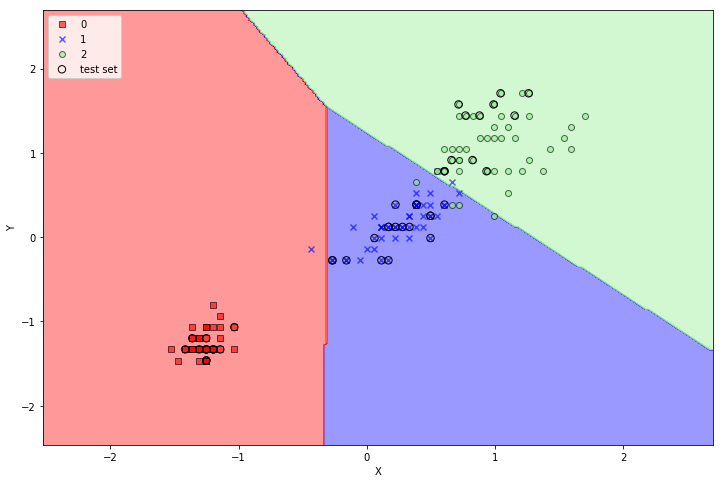

In [40]:
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

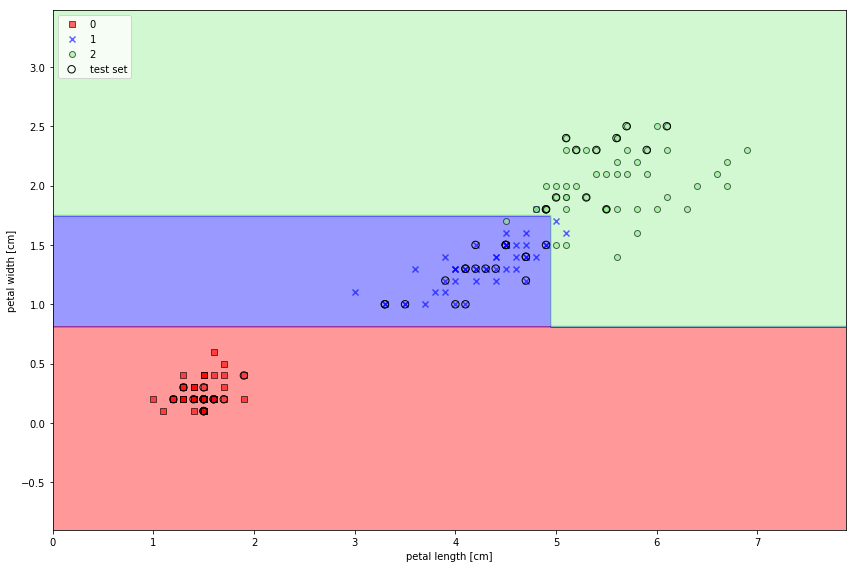

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

In [51]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus 
dot_data = export_graphviz(tree, 
                out_file=None, 
                feature_names=['petal length', 'petal width'])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

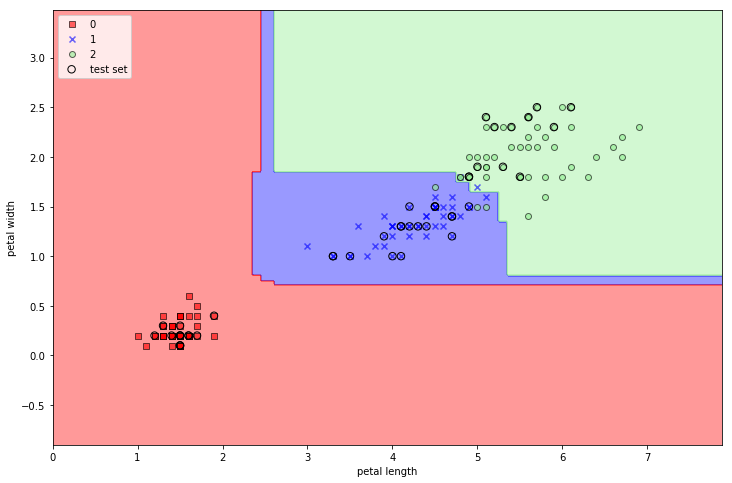

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=819, max_depth=3)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [44]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

1.0